# Assignment 3 - Text Analysis
An explanation this assignment could be found in the .pdf explanation document


## Materials to review for this assignment
<h4>From Moodle:</h4> 
<h5><u>Review the notebooks regarding the following python topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Working with strings</b> (tutorial notebook)<br/>
&#x2714; <b>Text Analysis</b> (tutorial notebook)<br/>
&#x2714; <b>Hebrew text analysis tools (tokenizer, wordnet)</b> (moodle example)<br/>
&#x2714; <b>(brief review) All previous notebooks</b><br/>
</div> 
<h5><u>Review the presentations regarding the following topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Text Analysis</b> (lecture presentation)<br/>
&#x2714; <b>(brief review) All other presentations</b><br/>
</div>

## Personal Details:

In [ ]:
# Details Student 1:

# Name: Shoval Nakash
# ID: 207207838

# Details Student 2:

# No


## Preceding Step - import modules (packages)
This step is necessary in order to use external modules (packages). <br/>

In [1]:
# --------------------------------------
import pandas as pd
import numpy as np
# --------------------------------------


# --------------------------------------
# ------------- visualizations:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# --------------------------------------


# ---------------------------------------
import sklearn
from sklearn import preprocessing, metrics, pipeline, model_selection, feature_extraction 
from sklearn import naive_bayes, linear_model, svm, neural_network, neighbors, tree
from sklearn import decomposition, cluster

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV 
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# ---------------------------------------


# ----------------- output and visualizations: 
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)
# show several prints in one cell. This will allow us to condence every trick in one cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# ---------------------------------------

### Text analysis and String manipulation imports:

In [2]:
# --------------------------------------
# --------- Text analysis and Hebrew text analysis imports:
# vectorizers:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# regular expressions:
import re
# --------------------------------------

### (optional) Hebrew text analysis - WordNet (for Hebrew)
Note: the WordNet is not a must

#### (optional) Only if you didn't install Wordnet (for Hebrew) use:

In [ ]:
# word net installation:

# unmark if you want to use and need to install
# !pip install wn
# !python -m wn download omw-he:1.4

In [ ]:
# word net import:

# unmark if you want to use:
# import wn

### (optional) Hebrew text analysis - hebrew_tokenizer (Tokenizer for Hebrew)
Note: the hebrew_tokenizer is not a must

#### (optional) Only if you didn't install hebrew_tokenizer use:

In [ ]:
# Hebrew tokenizer installation:

# unmark if you want to use and need to install:
# !pip install hebrew_tokenizer

In [ ]:
# Hebrew tokenizer import:

# unmark if you want to use:
# import hebrew_tokenizer as ht

### Reading input files
Reading input files for train annotated corpus (raw text data) corpus and for the test corpus

In [3]:
train_filename = 'annotated_corpus_for_train.csv'
test_filename  = 'corpus_for_test.csv'
df_train = pd.read_csv(train_filename, index_col=None, encoding='utf-8')
df_test  = pd.read_csv(test_filename, index_col=None, encoding='utf-8')

In [4]:
df_train.head(8)
df_train.shape

,story,gender
0,"כשחבר הזמין אותי לחול, לא באמת חשבתי שזה יקרה,...",m
1,לפני שהתגייסתי לצבא עשיתי כל מני מיונים ליחידו...,m
2,מאז שהתחילו הלימודים חלומו של כל סטודנט זה הפנ...,f
3,"כשהייתי ילד, מטוסים היה הדבר שהכי ריתק אותי. ב...",m
4,‏הייתי מדריכה בכפר נוער ומתאם הכפר היינו צריכי...,f
5,לפני כ3 חודשים טסתי לרומא למשך שבוע. טסתי במטו...,f
6,אני כבר שנתיים נשוי והשנה אני ואישתי סוף סוף י...,m
7,השנה התחלנו שיפוץ בדירה שלנו בתל אביב. הדירה ה...,f


(753, 2)

In [5]:
df_test.head(3)
df_test.shape

,test_example_id,story
0,0,כל קיץ אני והמשפחה נוסעים לארצות הברית לוס אנג...
1,1,"הגעתי לשירות המדינה אחרי שנתיים כפעיל בתנועת ""..."
2,2,אחת האהבות הגדולות שלי אלו הכלבים שלי ושל אישת...


(323, 2)

### Your implementation:
Write your code solution in the following code-cells

# Data cleaning+ train+ test

In [7]:
df_train.drop_duplicates(inplace=True)
df_test.drop_duplicates(inplace=True)

### Analysing Train Data Frame

Text(0, 10, '573')

Text(0, 10, '177')

Text(0.5, 0, 'Gender')

Text(0, 0.5, 'Count')

(array([0, 1]), [Text(0, 0, 'm'), Text(1, 0, 'f')])

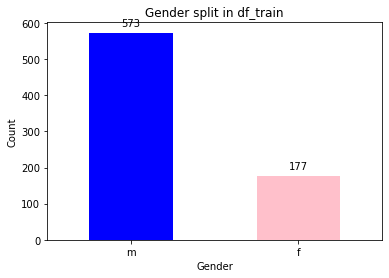

In [12]:
gender_split = df_train['gender'].value_counts()
sx = gender_split.plot(kind='bar', color=['blue', 'pink'], title='Gender split in df_train')

for p in sx.patches:
    sx.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [16]:
Male_samples = df_train[df_train['gender'] == 'm']
Female_samples = df_train[df_train['gender'] == 'f']
print("The number of male stories is:",Male_samples.shape[0])
print("The number of female stories is:",Female_samples.shape[0])
print(" ")


M_downsampled = Male_samples.sample(len(Female_samples))
print("After subtraction the number of male stories:",M_downsampled.shape[0])
print("The number of female stories is:",Female_samples.shape[0])
print("")

print("The concated DataFrame:")
df_train = pd.concat([M_downsampled, Female_samples])
df_train
print("")

print("Shuffle rows of the dataframe:")
df_train = df_train.sample(frac=1).reset_index(drop=True)
df_train

The number of male stories is: 573
The number of female stories is: 177
 
After subtraction the number of male stories: 177
The number of female stories is: 177

The concated DataFrame:


,story,gender
107,בשנה האחרונה ניצלתי את הזמן של הקורונה ואת העו...,m
174,"לפני כחצי שנה, בספטמבר 2020, יצאתי מביתי ברמת ...",m
622,סיפור על חווית מסיבת רווקים עבור חבר. במסיבת ה...,m
705,טסתי לספרד עם בת זוגתי לראות משחק כדורגל של הק...,m
648,במהלך תקופת הקורונה החלטתי שאני רוצה לעשות דבר...,m
...,...,...
737,"במהלך השנה רכשתי דירה שזקוקה לשיפוץ מסיבי, השי...",f
741,השנה עברתי את החוויה הכי גדולה וטהורה שיכולתי ...,f
743,גרתי במשך תקופה ארוכה עם 3 שותפים כאשר אני בקו...,f
745,אז רציתי לספר לכם חוויה שעברתי אני יודעת מראש ...,f



Shuffle rows of the dataframe:


,story,gender
0,לפני מספר חודשים טסתי לחו״ל פעם ראשונה מהרגע ש...,m
1,בשנה האחרונה אני בן זוגי רצינו לעבור לדירה משו...,f
2,אני הולך לספר על חוויה שקרתה לי בחצי שנה האחרו...,m
3,לפני מספר חודשים חיליתי בנגיף הארור נגיף הקורו...,m
4,במהלך תקופת הקורונה נחשפתי למקרים רבים של מבוג...,f
...,...,...
349,הכל מתחיל בשנת 2020 הייתי אז שנה א במדעי המחשב...,f
350,"זה היה יום גשום , אני וחברה שלי היינו רעבים ,ח...",m
351,יום אחד הלכתי לטייל בפארק שליד הבית שלי . אני ...,m
352,"משחק כדורגל, זה ללא ספק אחת החוויות הטובות יות...",m


### Text manipulation

In [17]:
def Text_preprocess(text):
    text = re.sub(r'\b\d{1,2}:\d{2}\b', '', text)
    text = re.sub(r'!+', '', text)
    text = re.sub(r'–', '', text)
    text = re.sub(r'[^a-zA-Zא-תםןךףץ" \n]', '', text)
    words = text.split()
    words = [word for word in words if len(word) >= 3]

    return ' '.join(words)

In [23]:
df_train['story'] = df_train['story'].apply(Text_preprocess)
df_test['story'] = df_test['story'].apply(Text_preprocess)

In [30]:
from sklearn.model_selection import GridSearchCV, cross_val_predict
def evaluate_classifiers(X, y):
    
    tfidf_Vectorizer = TfidfVectorizer(tokenizer=lambda x: x.split(), preprocessor=lambda x: x,
                                       ngram_range=(1,3), min_df=0, max_df=300, max_features=8000)
    count_Vectorizer = CountVectorizer(tokenizer=lambda x:x.split(' '), 
                                       ngram_range=(1,3), min_df=0, max_df=650, max_features=8000)

    classifiers = [
        ('LinearSVC', LinearSVC()),
        ('SGDClassifier', SGDClassifier(random_state=42)),
        ('MultinomialNB', MultinomialNB()),
        ('GaussianNB', GaussianNB()),
        ('DecisionTreeClassifier', DecisionTreeClassifier(random_state=42)),
        ('KNeighbors', KNeighborsClassifier())
    ]
    
    param_grids = {
        'DecisionTreeClassifier': {'max_depth': [2, 4, 6, 8, 10]},
        'KNeighbors': {'n_neighbors': [3, 5, 7]}
    }
    
    pipelines = [
        ('text_clf_tfidf', Pipeline([
            ('vect', tfidf_Vectorizer),
            ('clf', None)
        ])),
        ('text_clf_count', Pipeline([
            ('vect', count_Vectorizer),
            ('clf', None)  
        ]))
    ]

    results = {}
    best_score = 0
    best_tokenizer = None
    best_classifier = None

    for pipe_name, pipeline in pipelines:
        for clf_name, classifier in classifiers:
            if clf_name in param_grids:
                grid_search = GridSearchCV(classifier, param_grids[clf_name], cv=10, scoring='f1_macro')
                grid_search.fit(pipeline.named_steps['vect'].fit_transform(X), y)
                best_classifier_temp = grid_search.best_estimator_
            else:
                best_classifier_temp = classifier

            pipeline.set_params(clf=best_classifier_temp)
            
            if clf_name == 'GaussianNB':
                X_transformed = pipeline.named_steps['vect'].fit_transform(X).toarray()
                Y_pred = cross_val_predict(best_classifier_temp, X_transformed, y, cv=10)
            else:
                Y_pred = cross_val_predict(pipeline, X, y, cv=10)

            F1_male = f1_score(y, Y_pred, pos_label='m')
            F1_female = f1_score(y, Y_pred, pos_label='f')
            average_F1 = (F1_male + F1_female) / 2

            key = f"{pipe_name} with {clf_name}"
            results[key] = average_F1
            if average_F1 > best_score:
                best_score = average_F1
                best_tokenizer = pipeline.named_steps['vect']
                best_classifier = best_classifier_temp

    return results, best_tokenizer, best_classifier

In [31]:
X = df_train['story']
y = df_train['gender']
results, best_tokenizer, best_classifier = evaluate_classifiers(X, y)
results
print("")
best_tokenizer
best_classifier

{'text_clf_tfidf with LinearSVC': 0.6975446161216913,
 'text_clf_tfidf with SGDClassifier': 0.705453149001536,
 'text_clf_tfidf with MultinomialNB': 0.7132591766847647,
 'text_clf_tfidf with GaussianNB': 0.62653452685422,
 'text_clf_tfidf with DecisionTreeClassifier': 0.5498092412039,
 'text_clf_tfidf with KNeighbors': 0.629585846080115,
 'text_clf_count with LinearSVC': 0.683454156420656,
 'text_clf_count with SGDClassifier': 0.6608437390221314,
 'text_clf_count with MultinomialNB': 0.7181777974347634,
 'text_clf_count with GaussianNB': 0.623930668157674,
 'text_clf_count with DecisionTreeClassifier': 0.6186410246179628,
 'text_clf_count with KNeighbors': 0.40250030991637026}

CountVectorizer(max_df=650, max_features=8000, min_df=0, ngram_range=(1, 3),
                tokenizer=<function evaluate_classifiers.<locals>.<lambda> at 0x000002F2D507AB80>)

MultinomialNB()

In [32]:
X_train_Transformed = best_tokenizer.transform(df_train['story'])
Y_train = df_train['gender']

if isinstance(best_classifier, GaussianNB):
    X_train_Transformed = X_train_Transformed.toarray()

best_classifier.fit(X_train_Transformed, Y_train)

X_test_Transformed = best_tokenizer.transform(df_test['story'])

if isinstance(best_classifier, GaussianNB):
    X_test_Transformed = X_test_Transformed.toarray()

Y_pred_test = best_classifier.predict(X_test_Transformed)

df_test['predicted_gender'] = Y_pred_test

df_test.head()
df_test.tail()

MultinomialNB()

,test_example_id,story,predicted_gender
0,0,קיץ אני והמשפחה נוסעים לארצות הברית לוס אנגלס ...,m
1,1,"הגעתי לשירות המדינה אחרי שנתיים כפעיל בתנועת ""...",m
2,2,אחת האהבות הגדולות שלי אלו הכלבים שלי ושל אישת...,m
3,3,רגע הגיוס לצבא היה הרגע הכי משמעותי עבורי אני ...,m
4,4,אני הגעתי לברזיל ישר מקולומביה וגם אני עשיתי ע...,f


,test_example_id,story,predicted_gender
318,318,בשנה האחרונה הרגשתי תקוע בעבודה השגרה הפכה למש...,m
319,319,אני ואילן חברים טובים מזה שנה תמיד חלמנו לפתח ...,m
320,320,מידי יום שישי אני נוהג לנסוע בתחבורה ציבורית ס...,m
321,321,לפני מספר חודשים בשיא התחלואה הגל השני עמית של...,m
322,322,היום דיווחתי גניבה האוטו שלי בוקר אחד התעוררתי...,m


### Save output to csv (optional)
After you're done save your output to the 'classification_results.csv' csv file.<br/>
We assume that the dataframe with your results contain the following columns:
* column 1 (left column): 'test_example_id'  - the same id associated to each of the test stories to be predicted.
* column 2 (right column): 'predicted_category' - the predicted gender value for each of the associated story. 

Assuming your predicted values are in the `df_predicted` dataframe, you should save you're results as following:

In [33]:
df_predicted=df_test

df_predicted.to_csv('classification_results.csv',index=False)